In [1]:
from astropy.io import ascii
from astropy.table import vstack
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
cats = [
"""
 SLOT        ID  TYPE   SZ   P_ACQ    MAG   MAXMAG   YANG   ZANG DIM RES HALFW
  0   260182104   BOT  8x8   0.985   8.733  10.234    706   2150  20   1  120 
  1   260186728   BOT  8x8   0.781   9.793  11.297   2224   -301  27   1  155 
  2   260189768   BOT  8x8   0.841   9.541  11.047   1746  -1652  28   1  160 
  3   260189856   BOT  8x8   0.985   8.456   9.953    641   -451  28   1  160 
  4   260189888   BOT  8x8   0.985   8.332   9.828   1607  -2273  23   1  135 
  5   260184848   ACQ  8x8   0.833   9.578  11.078      6   1998  23   1  135 
  6   260185120   ACQ  8x8   0.895   9.980  11.484   1537     33  20   1  120 
  7   260327040   ACQ  8x8   0.854  10.081  11.578   -163    231  20   1  120 
""",

"""
 SLOT        ID  TYPE   SZ   P_ACQ    MAG   MAXMAG   YANG   ZANG DIM RES HALFW
  0   428605656   BOT  8x8   0.985   7.544   9.047   1899  -1224  32   1  180 
  1   428606880   BOT  8x8   0.890   9.227  10.734    240   1294  28   1  160 
  2   428611632   BOT  8x8   0.944   8.810  10.312  -2121    408  28   1  160 
  3   428615936   BOT  8x8   0.890   9.223  10.734    485    936  28   1  160 
  4   428616096   BOT  8x8   0.985   8.220   9.719   -823   -850  32   1  180 
  5   428611624   ACQ  8x8   0.826   9.343  11.281  -1725  -1998  28   1  160 
  6   428608360   ACQ  8x8   0.950   8.768  10.266  -1369  -2217  28   1  160 
  7   428610912   ACQ  8x8   0.841   9.538  11.047   2187    796  28   1  160 
""",

"""
 SLOT        ID  TYPE   SZ   P_ACQ    MAG   MAXMAG   YANG   ZANG DIM RES HALFW
  0   260182104   BOT  8x8   0.985   8.733  10.234    723   2144  20   1  120 
  1   260186728   BOT  8x8   0.781   9.793  11.297   2221   -318  27   1  155 
  2   260189768   BOT  8x8   0.841   9.541  11.047   1733  -1665  28   1  160 
  3   260189856   BOT  8x8   0.985   8.456   9.953    638   -455  28   1  160 
  4   260189888   BOT  8x8   0.985   8.332   9.828   1589  -2285  21   1  125 
  5   260184848   ACQ  8x8   0.833   9.578  11.078     22   1998  23   1  135 
  6   260185120   ACQ  8x8   0.895   9.980  11.484   1538     21  20   1  120 
  7   260327040   ACQ  8x8   0.854  10.081  11.578   -161    232  20   1  120 
""",

"""
 SLOT        ID  TYPE   SZ   P_ACQ    MAG   MAXMAG   YANG   ZANG DIM RES HALFW
  0   873598736   BOT  8x8   0.761   9.870  11.375  -1533    678  22   1  130 
  1   873599040   BOT  8x8   0.810   9.402  10.906   2031    315  28   1  160 
  2   873602864   BOT  8x8   0.985   8.329   9.828  -1825  -1068  20   1  120 
  3   873603176   BOT  8x8   0.773   9.830  11.328    687    336  28   1  160 
  4   874122512   BOT  8x8   0.961   8.685  10.188   -414  -1789  28   1  160 
  5   874122704   BOT  8x8   0.985   6.603   8.109    657  -1663  28   1  160 
  6   874124288   BOT  8x8   0.853   9.481  10.984   -341  -1444  28   1  160 
  7   873601664   ACQ  8x8   0.797  10.213  11.719  -1490   -970  20   1  120 
""",
"""
 SLOT        ID  TYPE   SZ   P_ACQ    MAG   MAXMAG   YANG   ZANG DIM RES HALFW
  3  1200756680   BOT  6x6   0.985   7.818   9.328    714  -1291  32   1  180 
  4  1200758760   BOT  6x6   0.985   8.298   9.797  -2217  -1262  18   1  110 
  5  1200760024   BOT  6x6   0.985   8.462   9.969   2216    520  28   1  160 
  6  1200888464   BOT  6x6   0.885   9.265  10.766   1096   1566  28   1  160 
  7  1200759616   ACQ  6x6   0.752   9.887  11.391   1873  -2055  28   1  160 
  0  1200758808   ACQ  6x6   0.891   9.219  10.719   -674  -1911  28   1  160 
  1  1200756560   ACQ  6x6   0.824   9.621  11.125   1635    184  28   1  160 
  2  1200757792   ACQ  6x6   0.788   9.767  11.266  -1645    597  28   1  160 
""",

"""
 SLOT        ID  TYPE   SZ   P_ACQ    MAG   MAXMAG   YANG   ZANG DIM RES HALFW
 3    31984984   BOT  6x6   0.753   9.877  11.375  -2133    321  26   1  150
 4    31988864   BOT  6x6   0.929   9.849  11.359   2007   1638  20   1  120
 5    31989744   BOT  6x6   0.941   8.836  10.344    158   -581  21   1  125
 6    31990800   BOT  6x6   0.934   9.827  11.328   1284  -1484  19   1  115
 7    31991816   BOT  6x6   0.963   8.664  10.172    529   1235  28   1  160
 0    31985848   ACQ  6x6   0.924   9.868  11.375  -1153   -458  16   1  100
 1    31990344   ACQ  6x6   0.829  10.113  11.609    247    441  20   1  120
 2    31990928   ACQ  6x6   0.747   9.796  11.297    408   -496  20   1  120
""",

"""
 SLOT        ID  TYPE   SZ   P_ACQ    MAG   MAXMAG   YANG   ZANG DIM RES HALFW
 3   261492080   BOT  6x6   0.884   9.266  10.766   1547  -1569  28   1  160
 4   261498392   BOT  6x6   0.985   8.298   9.797   1118   -194  32   1  180
 5   261502496   BOT  6x6   0.985   7.311   8.812    822    354  32   1  180
 6   261505232   BOT  6x6   0.796   9.733  11.234   2249   2202  27   1  155
 7   261494640   ACQ  6x6   0.914   9.904  11.406    788  -1484  20   1  120
 0   261497216   ACQ  6x6   0.732   9.932  11.438    407  -2192  23   1  135
 1   261502080   ACQ  6x6   0.648  10.365  11.875    825  -1253  20   1  120
 2   261500856   ACQ  6x6   0.463  10.554  12.062  -1972  -1416  20   1  120
""",
    # Obsid 17515
"""
 SLOT        ID  TYPE   SZ   P_ACQ    MAG   MAXMAG   YANG   ZANG DIM RES HALFW
 3   411707968   BOT  6x6   0.985   7.249   8.750    430   1103  32   1  180          
 4   411722416   BOT  6x6   0.985   7.834   9.344  -1863   2054  32   1  180          
 5   413405352   BOT  6x6   0.985   8.282   9.781   1619   -750  32   1  180          
 6   413425232   BOT  6x6   0.954   8.739  10.250  -1929  -2221  28   1  160 
 7   412240768   ACQ  6x6   0.985   8.375   9.875   2034    203  28   1  160 
 0   413412048   ACQ  6x6   0.907   9.093  10.594   1542  -1999  28   1  160 
 1   413404968   ACQ  6x6   0.849   9.260  10.766   2006   -144  28   1  160 
 2   411716576   ACQ  6x6   0.834   9.312  11.062  -1625    721  28   1  160 
""",
# Obsid 18187
    """
 SLOT        ID  TYPE   SZ   P_ACQ    MAG   MAXMAG   YANG   ZANG DIM RES HALFW
  3    33035424   BOT  6x6   0.879  10.000  11.500   -749  -1034  20   1  120 
  4    33557464   BOT  6x6   0.985   8.289   9.797   1493   1604  28   1  160 
  5    33951168   BOT  6x6   0.985   8.145   9.641    203    591  32   1  180 
  6    33555848   ACQ  6x6   0.878  10.002  11.500   1803    764  20   1  120 
  7    33040808   ACQ  6x6   0.433  10.202  11.703  -1599  -1225  20   1  120 
  0    33042288   ACQ  6x6   0.508  10.502  12.000   -925   -563  20   1  120 
  1    33957136   ACQ  6x6   0.506  10.504  12.016  -1814   1505  20   1  120 
  2    33040184   ACQ  6x6   0.471  10.538  12.047  -1332  -2292  20   1  120 
    """
]

cats = [ascii.read(cat) for cat in cats]


In [3]:
len(cats)

9

In [4]:
statuses = [
    'TTTTTTFT',
    'TTTTTTTT',
    'TTFTTTTT',
    'TTTTTTTT',
    'TTTTTTTT',
    'FTTFTTTT',
    'TTTTFTTF',
    'TTTTTTTT', # 17515
    'TTTTFTTF' # 18187
]

In [5]:
for cat, status in zip(cats, statuses):
    cat['status'] = list(status)

In [6]:
cat = vstack(cats[:len(statuses)])

In [7]:
cata = cat[(cat['HALFW'] >= 150)]
cata

SLOT,ID,TYPE,SZ,P_ACQ,MAG,MAXMAG,YANG,ZANG,DIM,RES,HALFW,status
int64,int64,str3,str3,float64,float64,float64,int64,int64,int64,int64,int64,str1
1,260186728,BOT,8x8,0.781,9.793,11.297,2224,-301,27,1,155,T
2,260189768,BOT,8x8,0.841,9.541,11.047,1746,-1652,28,1,160,T
3,260189856,BOT,8x8,0.985,8.456,9.953,641,-451,28,1,160,T
0,428605656,BOT,8x8,0.985,7.544,9.047,1899,-1224,32,1,180,T
1,428606880,BOT,8x8,0.89,9.227,10.734,240,1294,28,1,160,T
2,428611632,BOT,8x8,0.944,8.81,10.312,-2121,408,28,1,160,T
3,428615936,BOT,8x8,0.89,9.223,10.734,485,936,28,1,160,T
4,428616096,BOT,8x8,0.985,8.22,9.719,-823,-850,32,1,180,T
5,428611624,ACQ,8x8,0.826,9.343,11.281,-1725,-1998,28,1,160,T


In [8]:
cato = cat[(cat['HALFW'] >= 150) & (cat['P_ACQ'] >= 0.7) & (cat['P_ACQ'] < 0.9)]
cato

SLOT,ID,TYPE,SZ,P_ACQ,MAG,MAXMAG,YANG,ZANG,DIM,RES,HALFW,status
int64,int64,str3,str3,float64,float64,float64,int64,int64,int64,int64,int64,str1
1,260186728,BOT,8x8,0.781,9.793,11.297,2224,-301,27,1,155,T
2,260189768,BOT,8x8,0.841,9.541,11.047,1746,-1652,28,1,160,T
1,428606880,BOT,8x8,0.89,9.227,10.734,240,1294,28,1,160,T
3,428615936,BOT,8x8,0.89,9.223,10.734,485,936,28,1,160,T
5,428611624,ACQ,8x8,0.826,9.343,11.281,-1725,-1998,28,1,160,T
7,428610912,ACQ,8x8,0.841,9.538,11.047,2187,796,28,1,160,T
1,260186728,BOT,8x8,0.781,9.793,11.297,2221,-318,27,1,155,T
2,260189768,BOT,8x8,0.841,9.541,11.047,1733,-1665,28,1,160,F
1,873599040,BOT,8x8,0.81,9.402,10.906,2031,315,28,1,160,T


In [9]:
p = np.linspace(0.0, 1.0, 50)


<IPython.core.display.Javascript object>


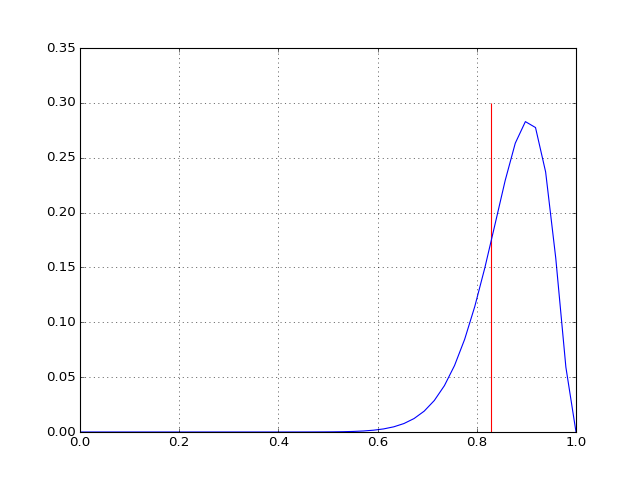

In [10]:
pmf = binom.pmf(np.count_nonzero(cato['status'] == 'T'), len(cato), p)
plt.figure()
plt.plot(p, pmf)
plt.grid()
y0, y1 = plt.ylim()
plt.vlines([np.mean(cato['P_ACQ'])], y0, y1, 'r')

<IPython.core.display.Javascript object>


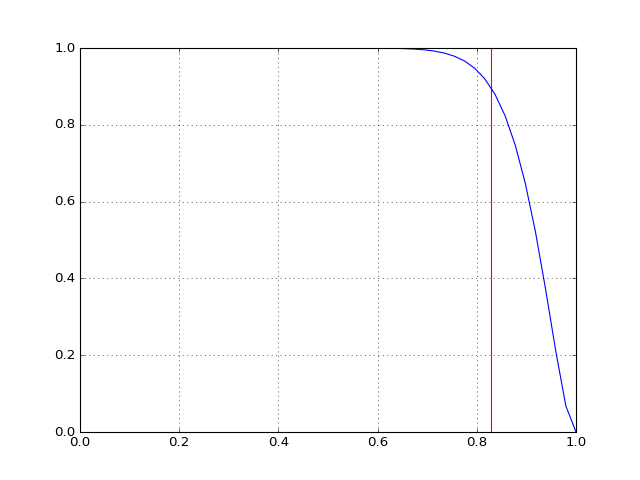

In [11]:
pmf = binom.cdf(np.count_nonzero(cato['status'] == 'T'), len(cato), p)
plt.figure()
plt.plot(p, pmf)
plt.grid()
y0, y1 = plt.ylim()
plt.vlines([np.mean(cato['P_ACQ'])], y0, y1, 'r')

In [12]:
np.sum(cato['P_ACQ'])

17.382999999999999

In [13]:
np.sum(cato['status'] == 'T')

19

In [14]:
np.sum(cata['P_ACQ'])

37.837000000000003

In [15]:
np.sum(cata['status'] == 'T')

40

In [16]:
len(cata)

42